100%|██████████| 100/100 [04:07<00:00,  2.47s/it]


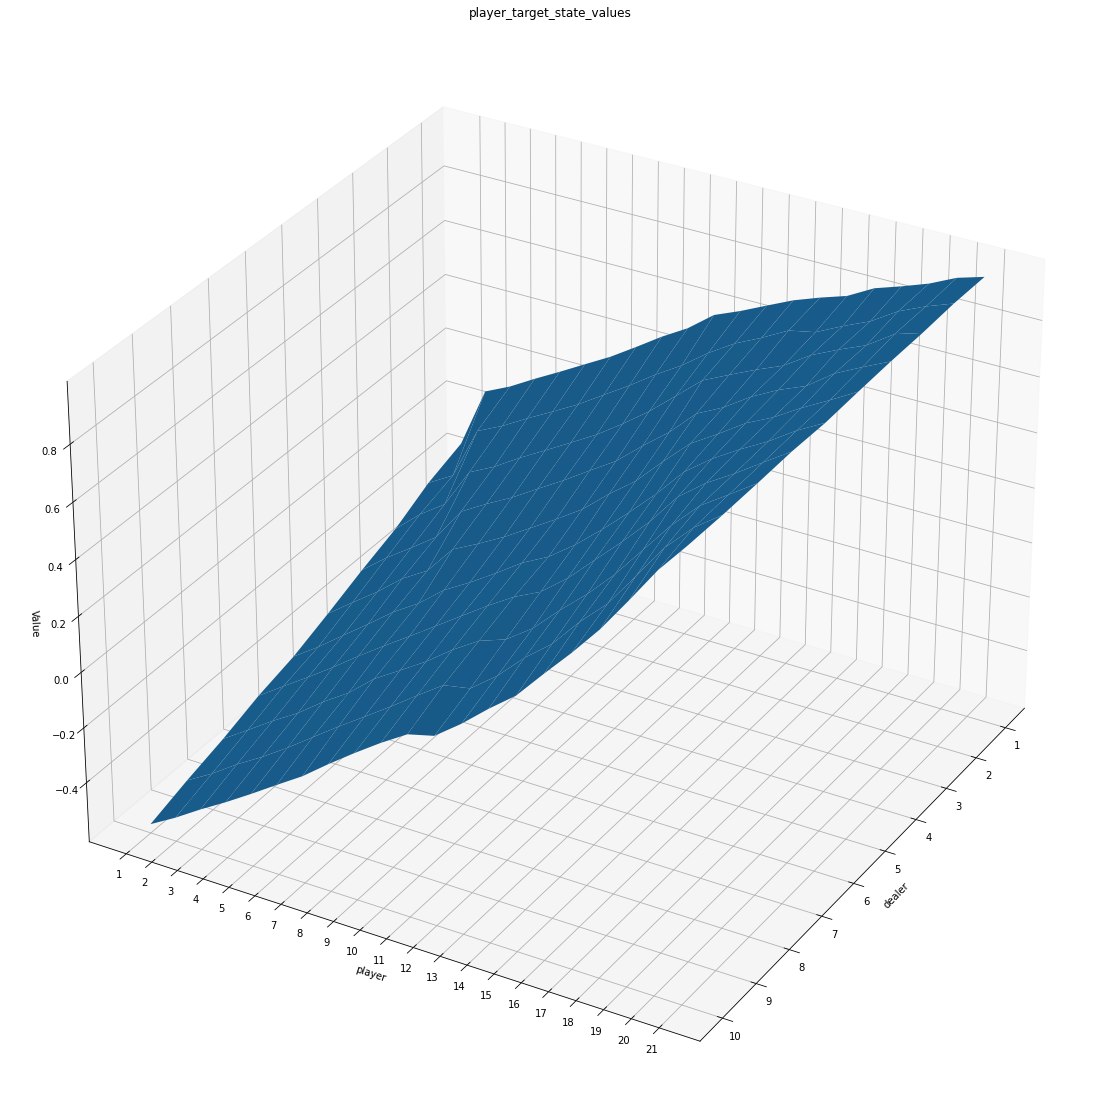

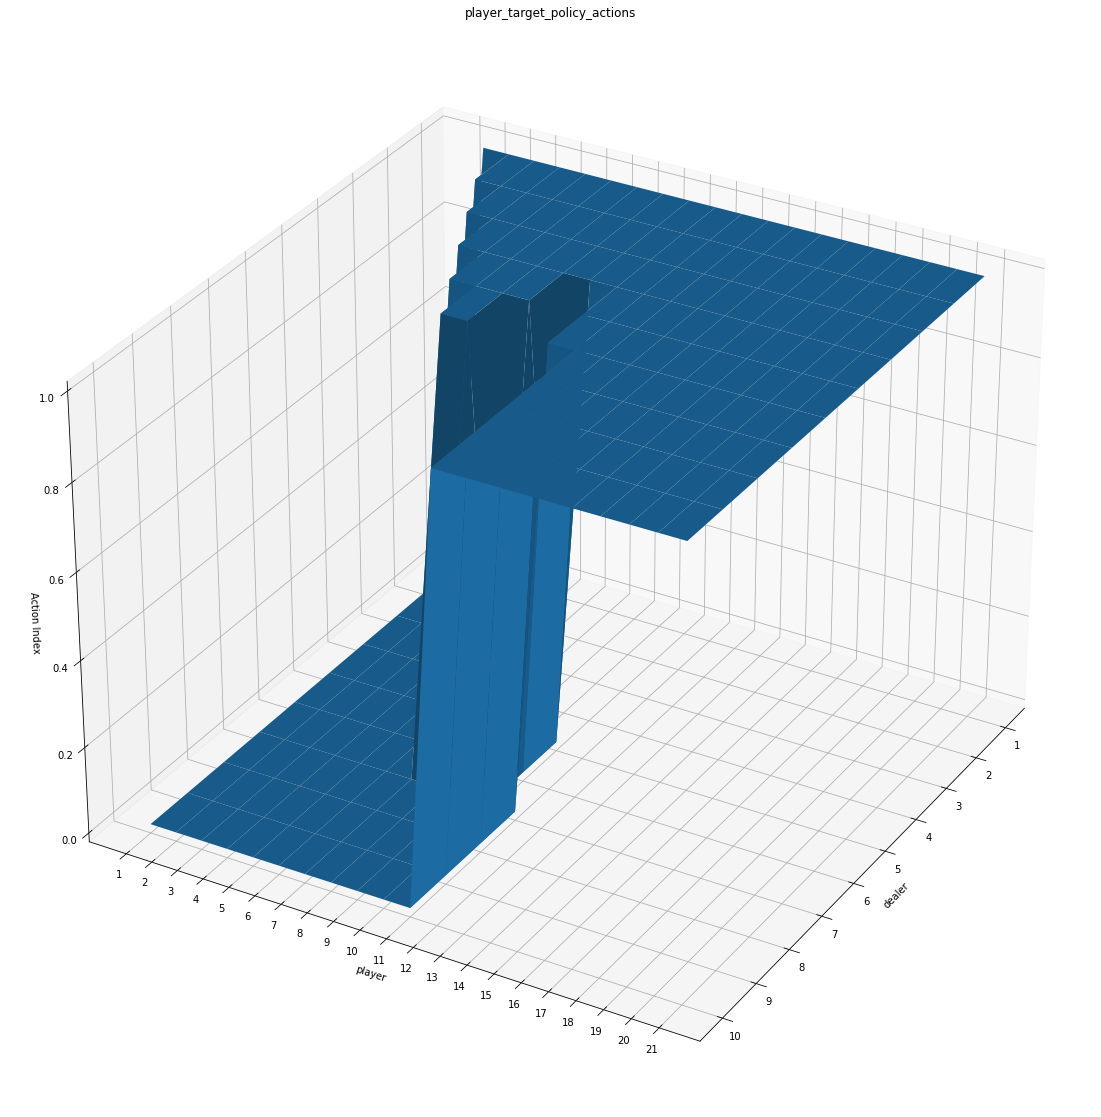

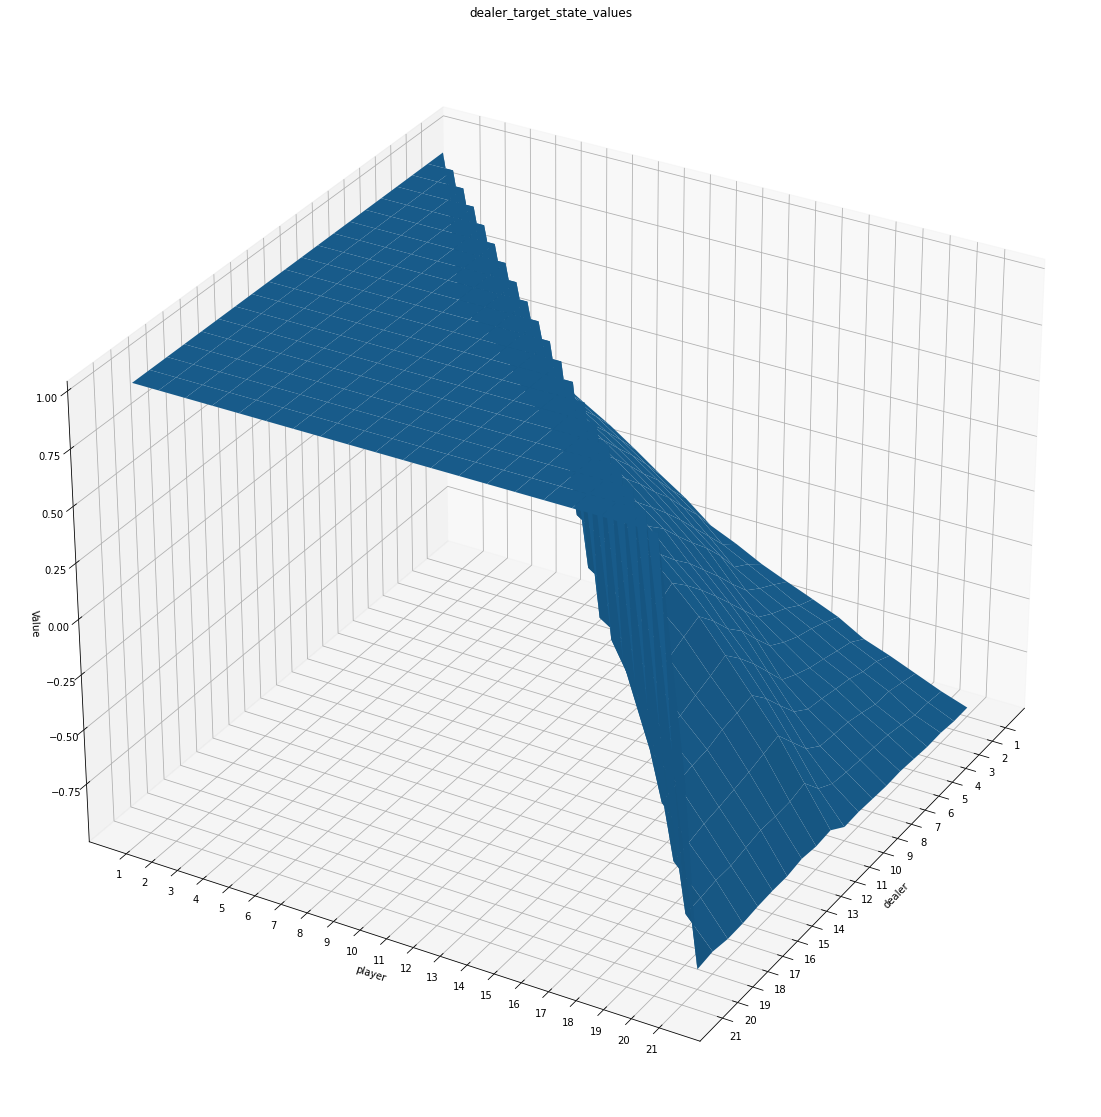

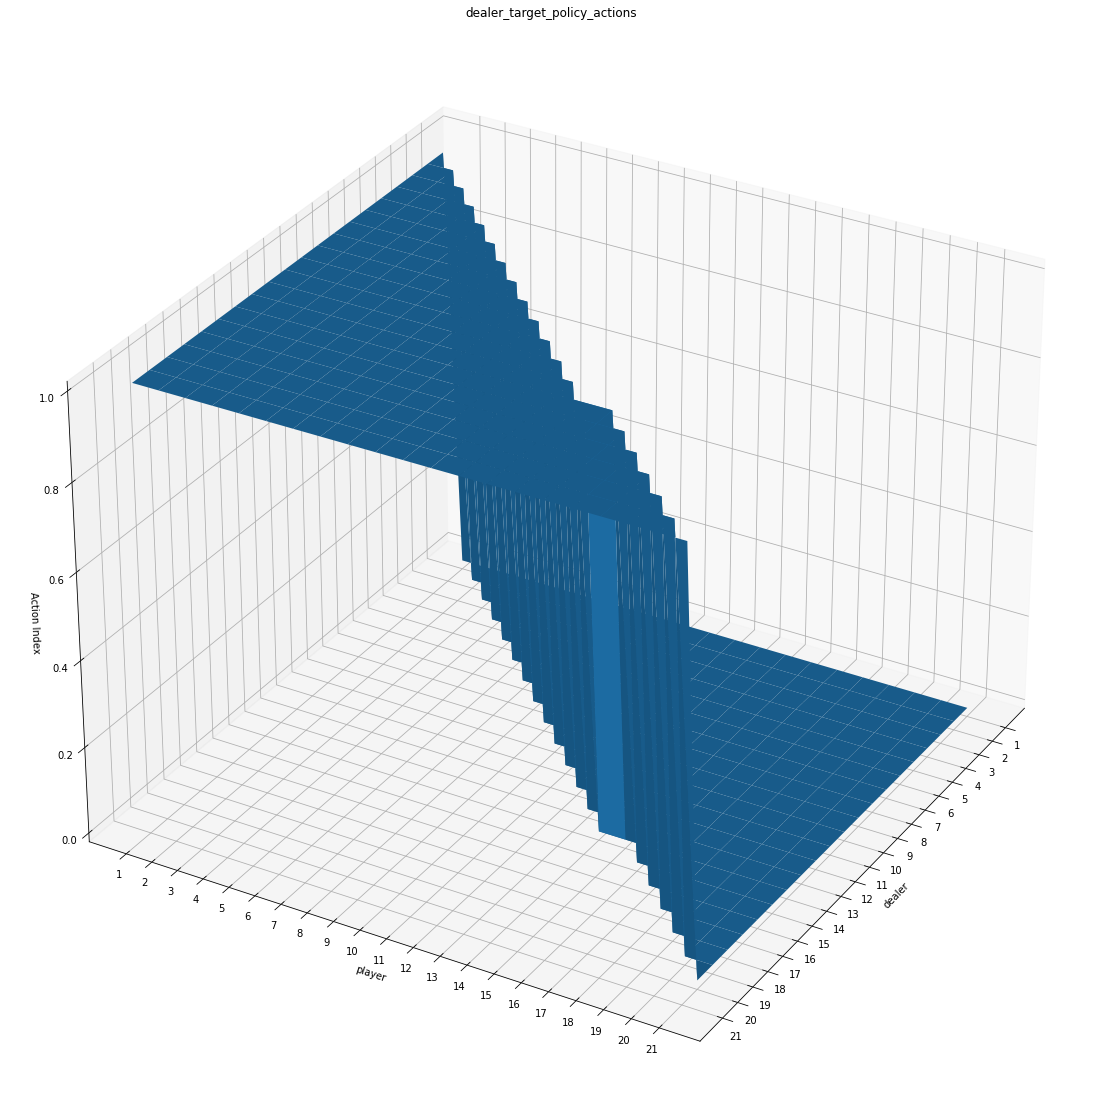

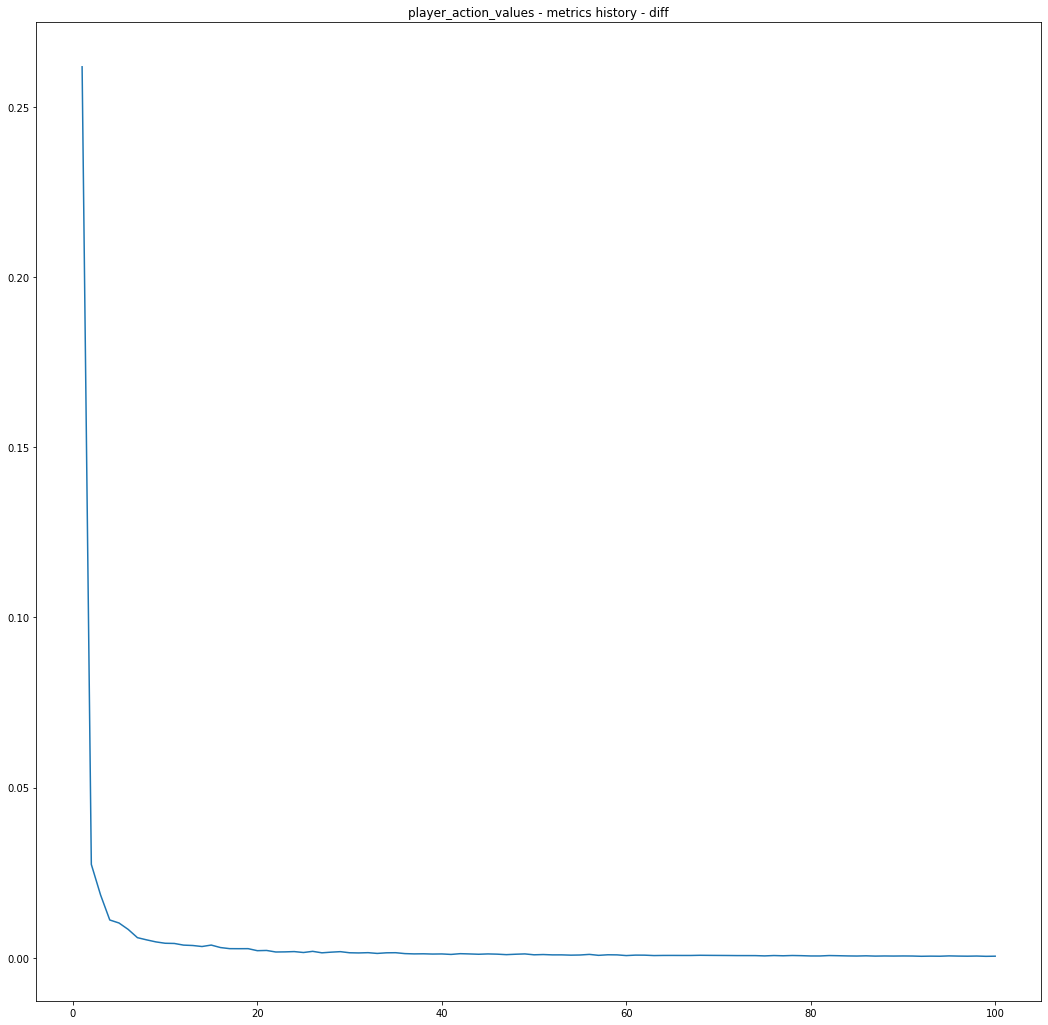

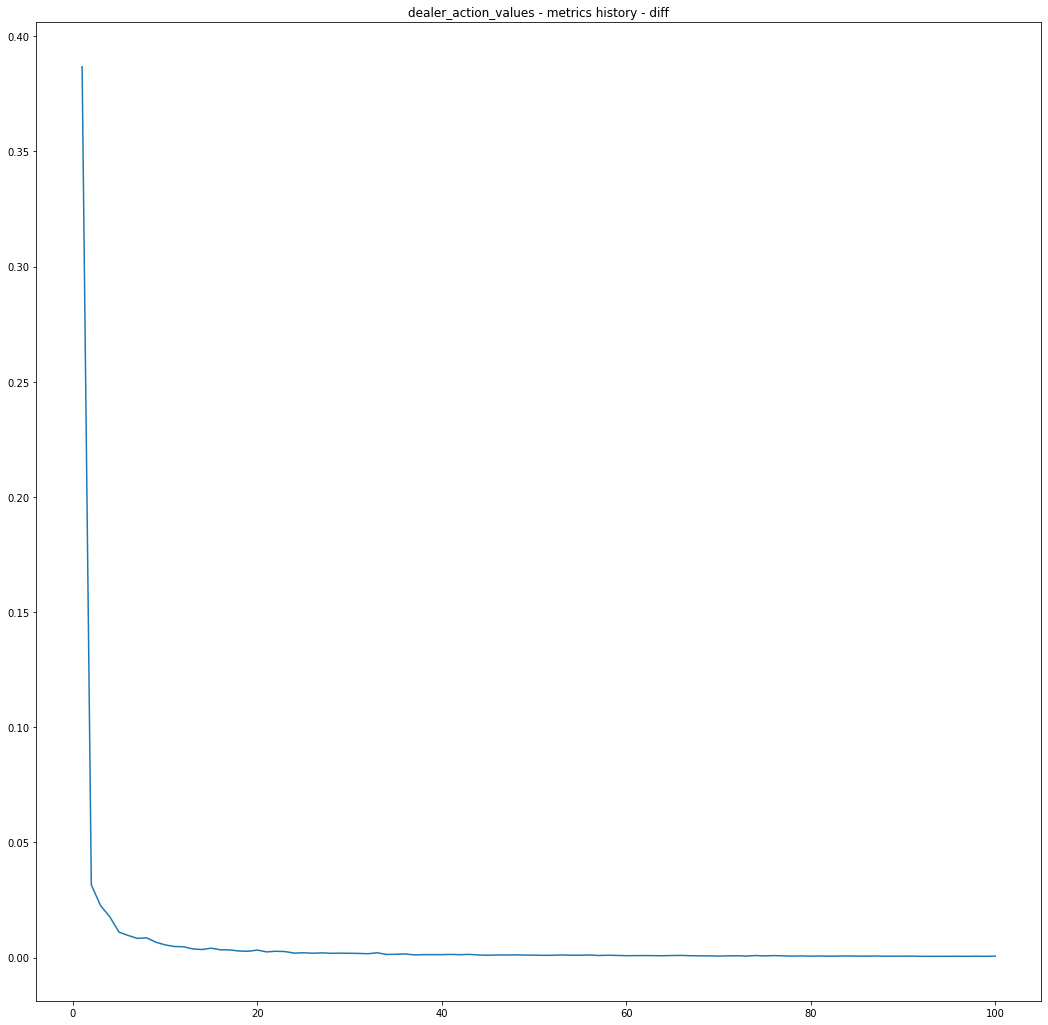

In [1]:
# TASK:
# - check the optimal state values and policy action for both
#   player and dealer
#
# PROCESS:
# - run BATCH * EPISODES playout
# - player, dealer both learn via monte_carlo_control
#
# RESULTS:
# - player's optimal policy action is slightly more complex
#   needs to stick when <10 while dealer > 5
# - dealer's optimal policy action is simply correlated if
#   dealer's hand is larger than player (hit when smaller)
#
# INTERPRETATION:
# - dealer has better visibility of the information determining
#   the results, therefore its optimal policy is simpler
# - player needs to integrate different possibilities into its
#   optimal policy action
#
# RUN:
# %%
import sys

sys.path.append("../")

from tqdm import trange

from src.module.model_free_agent import ModelFreeAgent

from src.easy_21.game import playout, ACTIONS, STATE_LABELS

#
# hyperparameters and agent config
#
BATCH = 100
EPISODES = int(1e5)

PLAYER = ModelFreeAgent("player", ACTIONS, STATE_LABELS)
DEALER = ModelFreeAgent("dealer", ACTIONS, STATE_LABELS)

#
# task process
#

for _ in trange(BATCH):
    for _ in range(EPISODES):
        playout(
            player_policy=PLAYER.e_greedy_policy,
            player_offline_learning=PLAYER.monte_carlo_learning_offline,
            dealer_policy=DEALER.e_greedy_policy,
            dealer_offline_learning=DEALER.monte_carlo_learning_offline,
        )

    PLAYER.action_value_store.metrics.record("diff")
    DEALER.action_value_store.metrics.record("diff")

PLAYER.set_target_value_stores()
PLAYER.plot_2d_target_value_stores(view_init=(30, 30))

DEALER.set_target_value_stores()
DEALER.plot_2d_target_value_stores(view_init=(30, 30))

PLAYER.action_value_store.metrics.plot_history("diff")
DEALER.action_value_store.metrics.plot_history("diff")
